## Analyzing Accuracy of Amazon Transcribe at Varying Levels of Speed
- Ben Jablonski
- Sukriti Rawal 

In the new environment created by COVID-19, our daily lives are increasingly reliant on virtual communication and collaboration. For students, in addition to changes in how they receive their education, engagement in extra-curricular activities has changed drastically as well.

One activity that has been especially impacted by the move to virtual platforms is debate since it requires students to listen and respond to each other’s arguments as well as prepare for common arguments opponents are presenting. Consequently, more teams are relying on automatic transcriptions to assess and scope out arguments other teams are reading. Having accurate transcriptions of speeches in a debate round is critical for debaters trying to learn from their peers on how to get better or prepare for common arguments which they may not have encountered during their own rounds. Additionally, debaters with hearing disabilities are reliant on transcriptions to assist their understanding of speeches in debate rounds. 

Both of our team members participated in debate, an activity where competitors speak extremely rapidly and with less natural inflection. We suspected that this would affect the quality of transcriptions, as commercialized speech-to-text programs likely perform best on speech at every day, conversational speed. To see if such programs can hold up in a debate setting, we set out to explore the accuracy of Amazon’s Transcribe tool at increasing speech input speeds. 



### Data
To test this question, we collected 80 different audio samples. Both of us read and recorded us speaking eight different texts at five different speeds: 75 words per minute, 125 words per minute, 175 words per minute, 225 words per minute, and 275 words per minute. The average conversation involves speech anywhere from 100 to 175 words per minute, so we would expect that Amazon Transcribe should do well at lower speeds. 

The texts that we are reading in the audio files come from a variety of sources: two texts from literature, two texts from research papers, two texts from social media and two texts from news articles. This gives us a variety of vocabulary that reflects both the average debate round and the average speech someone could give in any forum. 

Here are two examples of the audio files:


In [3]:
import IPython
import boto3
s3client = boto3.client(
    's3',
    region_name='us-east-1'
)
file = s3client.get_object(
            Bucket="qtm350-finalproject-inputspeechbucket",
            Key="2text_275wpm_ben.m4a"
            ) 
file = file['Body'].read()
IPython.display.Audio(file)

In [2]:
file = s3client.get_object(
            Bucket="qtm350-finalproject-inputspeechbucket",
            Key="7text_275wpm_suk.m4a"
            ) 
file = file['Body'].read()
IPython.display.Audio(file)

### Using Amazon Transcribe 
To use Amazon Transcribe, we use the SDK provided by Amazon to both generate transcription jobs and store them in an S3 Bucket, titled "qtm350-finalproject-outputtranscribebucket". The following code creates 80 different transcription jobs. It retrieves audio files from a different S3 Bucket, titled "qtm350-finalproject-inputspeechbucket". The "x" represents the number of the document that we are transcribing (ie the 1st document is an excerpt from *The Tale of Two Cities*) and the "y" represents the speed of the audio file at hand. For more information on the use of Amazon Transcribe, the [developer guide](https://docs.aws.amazon.com/transcribe/latest/dg/transcribe-dg.pdf#API_Reference) is linked. 

It is worth noting that this code may take up to two hours to run because each transcription job takes between 1 to 2 minutes. 


In [ ]:
from __future__ import print_function 
import time
for x in range(1,9):
    for y in range(1,6):
        transcribe = boto3.client('transcribe')
        job_name = "transcribe_ben_doc" + str(x) + "_speed" + str((25 + 50*y)) +"v1"
        job_uri = "s3://qtm350-finalproject-inputspeechbucket/" + str(x) + "text_" + str((25+50*y)) +"wpm_ben.m4a"
        transcribe.start_transcription_job(
            TranscriptionJobName=job_name, 
            Media={'MediaFileUri': job_uri}, 
            MediaFormat='mp4', 
            OutputBucketName = 'qtm350-finalproject-outputtranscribebucket',
            LanguageCode='en-US'
        )
        while True:
            status = transcribe.get_transcription_job(TranscriptionJobName=job_name)
            if status['TranscriptionJob']['TranscriptionJobStatus'] in ['COMPLETED', 'FAILED']:
                 break
            print("Not ready yet...") 
            time.sleep(55)
        print(status)

for x in range(1,9):
    for y in range(1,6):
        transcribe = boto3.client('transcribe')
        job_name = "transcribe_suk_doc" + str(x) + "_speed" + str((25 + 50*y)) + "v1"
        job_uri = "s3://qtm350-finalproject-inputspeechbucket/" + str(x) + "text_" + str((25+50*y)) +"wpm_suk.m4a"
        transcribe.start_transcription_job(
            TranscriptionJobName=job_name, 
            Media={'MediaFileUri': job_uri}, 
            MediaFormat='mp4', 
            OutputBucketName = 'qtm350-finalproject-outputtranscribebucket',
            LanguageCode='en-US'
        )
        while True:
            status = transcribe.get_transcription_job(TranscriptionJobName=job_name)
            if status['TranscriptionJob']['TranscriptionJobStatus'] in ['COMPLETED', 'FAILED']:
                 break
            print("Not ready yet...") 
            time.sleep(45)
        print(status)

Once the jobs are all completed, we can extract the text of the transcription through the following code. This example provides the transcription of the first document (an excerpt from *A Tale of Two Cities*), spoken by Ben at 75 words per minute. Notice that initially the data is in .json format and provides the confidence of Amazon Transcribe at each word that it transcribes. 

In [46]:
import json
s3client = boto3.client(
    's3',
    region_name='us-east-1'
)
fobject = s3client.get_object(
            Bucket="qtm350-finalproject-outputtranscribebucket",
            Key="transcribe_ben_doc" + "1" + "_speed" + "75"+ "v1.json"
            ) 
filedata = fobject['Body'].read()
filedata = json.loads(filedata)
filedata

{'jobName': 'transcribe_ben_doc1_speed75v1',
 'accountId': '835728619098',
 'results': {'transcripts': [{'transcript': 'It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epic of belief. It was Theis epic of incredulity. It was the season of light. It was the season of darkness. It was the spring of hope. It was theory, winter of despair. We had everything before us. We had nothing before us. We were all going direct to heaven. We were all going direct the other way. In short, the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison on Lee.'}],
  'items': [{'start_time': '1.24',
    'end_time': '1.52',
    'alternatives': [{'confidence': '1.0', 'content': 'It'}],
    'type': 'pronunciation'},
   {'start_time': '1.52',
    'end_time': '2.1',
    'alternatives': [{'confidence': '1.0', 'content': 'was'}

In [47]:
filedata['results']['transcripts'][0]['transcript']

'It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epic of belief. It was Theis epic of incredulity. It was the season of light. It was the season of darkness. It was the spring of hope. It was theory, winter of despair. We had everything before us. We had nothing before us. We were all going direct to heaven. We were all going direct the other way. In short, the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison on Lee.'


### Architecture 
Additionally, we have the architecture diagram for this analysis. We stored the audio files, text files and Amazon Transcribe results in different Amazon S3 buckets. We retrieved the data from each bucket into our Sagemaker notebook to conduct the analysis below. It is worth noting that it is not necessary to store the results of transcribe into an S3 bucket because a user can retrieve the Amazon Transcribe results through the job id. However, if a user does not store the results in an S3 Bucket then the results would expire in 90 days. 

![drawiochart](https://drive.google.com/uc?export=view&id=1QJwIUrwYH5zR0dHijhXsSSNygyinO6H7)



### Methodology 
To assess the accuracy of the Amazon Transcribe tool, we are using Word Error Rate and Word Information Loss which are frequently used by companies such as Baidu, Google, Microsoft, Amazon and IBM to test the accuracy of a speech to text tool. For example, Microsoft released analytics on the Word Error Rate of their Automatic Speech Recognition tool, scoring a remarkable 5.1%. 

The graph below shows the reported word error rates of different companies' automatic speech recognition tools and their improvements over the last few years. 

![graph](https://drive.google.com/uc?export=view&id=185AvjAiMIWV7tAcM3BQfaif6FJ5fRxj3)


So, how are word error rates calculated? The word error rate is calculated by a relatively intuitive formula: it takes the total number of words that were wrong in the transcription and divides this sum by the number of words that are in the reference transcript. For example, if the reference document is "I ate a peach", but the transcription tool produces "I ate a beach", the word error rate would be 25%. 

This elucidates some of the downsides of word error rate as a metric for transcription accuracy. The reference document gives an entirely different meaning than what the transcription's sentence provides, yet the word error rate is only 25%. Thus, even though the transcription functionally fails at its task to communicate the meaning of the source document, the transcription tool still gets a good score on the task. Another issue is that every word is given the same weight in the calculation. The words "a" and "the" are easy for an automatic speech recognition tool to successfully transcribe, but the word "antarctica" or deciphering between "peach", "beach" and "speech" are all difficult and are given the same weight as an easy task. 

Nevertheless, word error rate has a large upside. First, it is a very intuitive calculation of transcription accuracy. When we want to assess the accuracy of automatic speech recognition, we want to know how many words the tool correctly transcribes. Additionally, word error rate is heavily correlated with more complicated measures of transcription accuracy such as keyword error rate, a tool that relies on natural language processing models. In a [study](http://www.cs.toronto.edu/~mcosmin/pubs/interspeech2013_human-utility.pdf) titled, "Automatic Human Utility Evaluation of ASR Systems: Does WER Really Predict Preformance?" by researchers across the world, the authors conclude that word error rate is sufficient to assess the accuracy of a speech recognition tool. In fact, when compared with human assessment which provides context to the text and transcription, word error rate can surpass more complicated measures of transcription accuracy. 

Finally, we use word information loss to compensate for the shortcomings of word error rate. Word information loss (WIL) evaluates the information communicated in the transcript and reference document. 

Using the example above, with the reference document saying "I ate a peach" and the transcription writing "I ate a beach", the WER of these two data points is 25% while the WIL is 44%.

WIL is a much more complicated calculation, and only retains the dominant terms in a text. It uses a language model that determines the most important words in a text. Word information loss is very effective as an alternate measure of Automatic Speech Recognition accuracy when the information communicated is more important than the verbatim accuracy of a tool. To read more about the benefits of word information loss, this [study](http://catedrartve.unizar.es/reto2018/EvalPlan-S2T-v1.1.pdf) titled "IberSPEECH-RTVE 2018 Speech to Text Transcription Challenge" investigates the applicability of word error rate and word information loss to various transcription tasks. 

To calculate both of these measures, we are using the Python package [Jiwer](https://pypi.org/project/jiwer/).

### Results
We find that there is a clear and significant decrease at a 5% significance level in the effectiveness and accuracy of Amazon Transcribe as the words per minute of an audio file increase. We can see in the following graphs that both word error rate and word information loss decrease as speed increases with a distinct uptick in error rates and information loss once the speech speed surpasses 200 words per minute. It is important to note that both graphs have jittered x axes. This is because the audio files were all on specific speeds, so we wanted to make the scatter plot look more comprehensible. 



You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


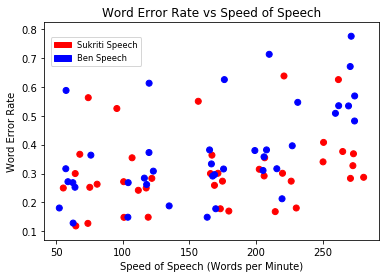

In [48]:
s3client = boto3.client(
    's3',
    region_name='us-east-1'
)
# creating lists that will become columns of a pandas dataframe
transcripts = []
docNumber = []
speed = []
speaker = []
realText = []
# these loops take transcriptions from the s3 bucket and the actual .txt files from a different s3 bucket and append them to separate lists
for x in range(1,9): ## these are all for sukriti
    for y in range(1,6):
        fobject = s3client.get_object( ## gets the transcriptions
            Bucket="qtm350-finalproject-outputtranscribebucket",
            Key="transcribe_suk_doc" + str(x) + "_speed" + str(25 + 50*y) + "v1.json" ## they all have a uniform naming convention based on doc number and speech speed
            ) 
        filedata = fobject['Body'].read()
        filedata = json.loads(filedata)
        transcripts.append(filedata['results']['transcripts'][0]['transcript']) ## append the texts of the transcriptions through unpacking the .json files as shown above
        docNumber.append(x)
        speed.append((25 + 50*y))
        speaker.append("Sukriti")
        fobject = s3client.get_object( ## gets the actual source texts 
            Bucket="qtm350-finalproject-inputtextbucket",
            Key= str(x) + "text.txt"
            ) 
        fdata = fobject['Body'].read()
        fdata = fdata.decode('utf-8') 
        realText.append(fdata) 
for x in range(1,9): ## these are all for ben -- the logic is identical as above 
    for y in range(1,6):
        fobject = s3client.get_object(
            Bucket="qtm350-finalproject-outputtranscribebucket",
            Key="transcribe_ben_doc" + str(x) + "_speed" + str(25 + 50*y) + "v1.json"
            ) 
        filedata = fobject['Body'].read()
        filedata = json.loads(filedata)
        transcripts.append(filedata['results']['transcripts'][0]['transcript'])
        docNumber.append(x)
        speed.append((25 + 50*y))
        speaker.append("ben")
        fobject = s3client.get_object(
            Bucket="qtm350-finalproject-inputtextbucket",
            Key= str(x) + "text.txt"
            ) 
        fdata = fobject['Body'].read()
        fdata = fdata.decode('utf-8') 
        realText.append(fdata)

import pandas as pd 

dataSetDF = pd.DataFrame( ## creates the pandas dataframe 
    {'transcripts': transcripts,
     'docNumber': docNumber,
     'speed': speed,
     'speaker': speaker,
     'realText': realText
    })
## Word error rate package 
!pip install jiwer 
import jiwer
wer = []
wil = [] 
for i in range(0,80):
    wer.append(jiwer.wer(dataSetDF['realText'][i], dataSetDF['transcripts'][i])) ## calculates WER for each text and audio file 
    wil.append(jiwer.wil(dataSetDF['realText'][i], dataSetDF['transcripts'][i]))
dataSetDF['Word Error Rate'] = wer
dataSetDF['Word Information Loss'] = wil

## Time to graph!

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
test = []
for element in dataSetDF['speaker']: 
    if element is "Sukriti":
        test.append("red")
    else:
        test.append("blue")
        
## this graphs the word error rate vs speech speed 
jitterSpeed = dataSetDF['speed'] + np.random.normal(-10,10, size = len(dataSetDF['speed'])) ## i jittered the x axis to make it look better
plt.scatter(jitterSpeed, dataSetDF['Word Error Rate'], c = test)
plt.xlabel("Speed of Speech (Words per Minute)")
plt.ylabel("Word Error Rate")
plt.title("Word Error Rate vs Speed of Speech")
red_patch = mpatches.Patch(color='red', label='Sukriti Speech')
blue_patch = mpatches.Patch(color='blue', label='Ben Speech')
plt.legend(handles=[red_patch,blue_patch], loc = (.02,0.8), fontsize = 'small')
plt.show();


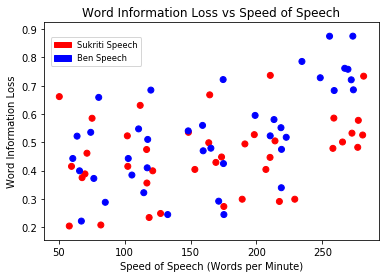

In [49]:
## this graphs the WIL vs Speech speed
jitterSpeed = dataSetDF['speed'] + np.random.normal(-9,9, size = len(dataSetDF['speed']))
plt.scatter(jitterSpeed, dataSetDF['Word Information Loss'], c = test)
plt.xlabel("Speed of Speech (Words per Minute)")
plt.ylabel("Word Information Loss")
plt.title("Word Information Loss vs Speed of Speech")
red_patch = mpatches.Patch(color='red', label='Sukriti Speech')
blue_patch = mpatches.Patch(color='blue', label='Ben Speech')
plt.legend(handles=[red_patch,blue_patch], loc = (.02,0.8), fontsize = 'small')
plt.show();

The data points that are distinctly higher in WER both come from *The Iliad* which illustrates that complicated words such as names derived from Greek  are not effectively transcribed by Amazon Transcribe. However, the other documents are transcribed with similar word error rates. 

We use linear regression with WER as the independent variable and both speaker (that is, Ben or Sukriti) and speed as the dependent variables. Because speed is categorical in nature, we use 75 words per minute as the reference group. Therefore,for example, the slope parameter for 275 words per minute shows the increase of WER when we increase speed of speech from 75 words per minute to the 275 words per minute. The slope parameter for speaker is not significant at a 5% significance level while every single slope parameter for speed is significant. The regression output is shown below, but this indicates that, holding speaker constant, word error rate increases by `0.457` if we increase speech speed from 75 to 275. A similar interpretation holds for other speech speeds, moving from 75 to whichever speed we are concerned with. 


In [50]:
## does the linear regression 
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
lmList_isSuk = []
for element in dataSetDF['speaker']:  ## creating the speaker variable -- gets a value of 1 if the speaker is sukriti; 0 if the speaker is ben 
    if element is "Sukriti":
        lmList_isSuk.append(1)
    else:
        lmList_isSuk.append(0)
dataSetDF['isSukriti'] = lmList_isSuk
wpm125 = []
wpm175 = []
wpm225 = []
wpm275 = []
for element in dataSetDF['speed']:  
    if element == 125:
        wpm125.append(1)
    else:
        wpm125.append(0)
        
for element in dataSetDF['speed']:  
    if element == 175:
        wpm175.append(1)
    else:
        wpm175.append(0)
        
for element in dataSetDF['speed']:  
    if element == 225:
        wpm225.append(1)
    else:
        wpm225.append(0)
        
for element in dataSetDF['speed']:  
    if element == 275:
        wpm275.append(1)
    else:
        wpm275.append(0)
dataSetDF['wpm125'] = wpm125
dataSetDF['wpm175'] = wpm175
dataSetDF['wpm225'] = wpm225
dataSetDF['wpm275'] = wpm275


        
x = dataSetDF[['isSukriti', 'wpm125', 'wpm175', 'wpm225', 'wpm275']]
results = sm.OLS(dataSetDF['Word Error Rate'], x).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:        Word Error Rate   R-squared (uncentered):                   0.761
Model:                            OLS   Adj. R-squared (uncentered):              0.745
Method:                 Least Squares   F-statistic:                              47.70
Date:                Sat, 14 Nov 2020   Prob (F-statistic):                    6.18e-22
Time:                        17:03:34   Log-Likelihood:                          22.256
No. Observations:                  80   AIC:                                     -34.51
Df Residuals:                      75   BIC:                                     -22.60
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In a similar way, we can use linear regression with Word Information Loss as the dependent variable. Again, the speaker variable is insignificant at a 5% significance level while every single speed variable's slope parameter is significantly positive. For example, this means that we would expect Word Information Loss would increase by `0.6166` on average when speech speed increases from 75 words per minute to 275 words per minute. The regression output is again provided below. 

In [51]:
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
lmList_isSuk = []
for element in dataSetDF['speaker']:  ## creating the speaker variable -- gets a value of 1 if the speaker is sukriti; 0 if the speaker is ben 
    if element is "Sukriti":
        lmList_isSuk.append(1)
    else:
        lmList_isSuk.append(0)
dataSetDF['isSukriti'] = lmList_isSuk
wpm125 = []
wpm175 = []
wpm225 = []
wpm275 = []
for element in dataSetDF['speed']:  
    if element == 125:
        wpm125.append(1)
    else:
        wpm125.append(0)
        
for element in dataSetDF['speed']:  
    if element == 175:
        wpm175.append(1)
    else:
        wpm175.append(0)
        
for element in dataSetDF['speed']:  
    if element == 225:
        wpm225.append(1)
    else:
        wpm225.append(0)
        
for element in dataSetDF['speed']:  
    if element == 275:
        wpm275.append(1)
    else:
        wpm275.append(0)
dataSetDF['wpm125'] = wpm125
dataSetDF['wpm175'] = wpm175
dataSetDF['wpm225'] = wpm225
dataSetDF['wpm275'] = wpm275
x = dataSetDF[['isSukriti', 'wpm125', 'wpm175', 'wpm225', 'wpm275']]
results = sm.OLS(dataSetDF['Word Information Loss'], x).fit()
print(results.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Word Information Loss   R-squared (uncentered):                   0.809
Model:                               OLS   Adj. R-squared (uncentered):              0.797
Method:                    Least Squares   F-statistic:                              63.62
Date:                   Sat, 14 Nov 2020   Prob (F-statistic):                    1.40e-25
Time:                           17:03:34   Log-Likelihood:                          5.4438
No. Observations:                     80   AIC:                                    -0.8875
Df Residuals:                         75   BIC:                                      11.02
Df Model:                              5                                                  
Covariance Type:               nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

### Conclusion 
In this blog post, we have shown the decreasing levels of accuracy using word error rates and word information loss of Amazon Transcribe as the speech speed of an audio file increases. In fact, we find a statistically significant association between the speed of a speech and the accuracy of Amazon Transcribe. Using linear regression, we find that Word Error Rates and Word Information Loss both increase by over 45% when speech speed increases from 75 words per minute to 275 words per minute. 

With the increasing virtualization of activities such as collegiate and high school debate, users of Amazon Transcribe must pay special attention to the accuracy of Amazon Transcribe when audio files contain quickly spoken text. 

As next steps, we would suggest including audio files of actual debate speeches to test the accuracy of transcription in a forum where Amazon Transcribe is necessary. Additionally, we would suggest including more speakers to further investigate the association between the speaker of a text and the accuracy of Amazon Transcribe. 

